In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('weights_heights.csv')
display(df.head())

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [4]:
df.dtypes

Height    float64
Weight    float64
dtype: object

In [5]:
df.shape

(15, 2)

In [6]:
df.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


Text(0, 0.5, 'Weight')

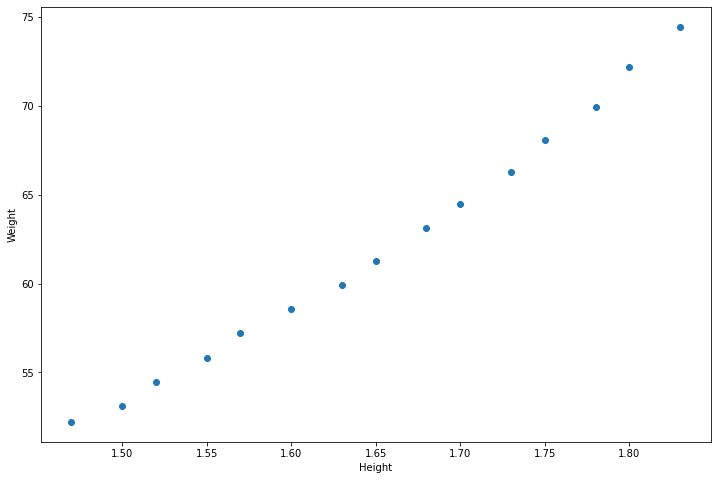

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

In [15]:
from sklearn.model_selection import train_test_split

X = df[['Weight']]
Y = df['Height']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

In [16]:
x_train.sample()

,Weight
8,63.11


Conforme a imagem anterior, executamos train_test_split para dividir o conjunto de dados em dois conjuntos, o de treinamento e o de teste. Especificamos test_size=0.4, isto é, o conjunto de teste será criado com 40% do conjunto de dados, ficando os 60% restantes para o conjunto de treinamento.

Em seguida, vamos instanciar o estimador de regressão linear e passar como parâmetros x_train e y_train. Observe que x_train contém 60% dos dados dos pesos e y_train contém 60% dos dados das alturas correspondentes a esses pesos. O modelo será treinado com esses dados.

In [17]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)


Na fase de treinamento, a regressão linear calcula o coeficiente linear, propriedade intercept de linear_model, e o coeficiente angular. O resultado é um modelo que expressa a relação entre as duas variáveis:

Weight=0.64424+(0.016177*Height)

In [22]:
coeficiente_linear = linear_model.intercept_
coeficiente_angular = linear_model.coef_[0]

print('Modelo Linear Simples: Intercept = {:.5}'.format(coeficiente_linear))
print('Modelo Linear Simples: Coefficient = {:.5}'.format(coeficiente_angular))
print('Modelo Linear Simples: Weight = {:.5} + {:.5}(Height)'.format(coeficiente_linear, coeficiente_angular))

Modelo Linear Simples: Intercept = 0.73992
Modelo Linear Simples: Coefficient = 0.014766
Modelo Linear Simples: Weight = 0.73992 + 0.014766(Height)


In [23]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.9910710542740759


O próximo passo é verificar se essa expressão, quando aplicada ao conjunto de teste (x_test), produz os resultados esperados (y_test). Para isso, chamamos o método predict passando como parâmetro o conjunto de teste e armazenamos os resultados em y_pred, que são os valores calculados pelo modelo.

In [24]:
y_pred = linear_model.predict(x_test)

In [25]:
from sklearn.metrics import r2_score

print('testing score: ', r2_score(y_test, y_pred))

testing score:  0.9580813487208216


Tendo os valores calculados pelo modelo (y_pred), podemos compará-los aos valores disponíveis no conjunto de teste (y_test).

Fazemos essa comparação por meio de r2_score, um método que calcula quanto da variação nos pontos de dados é captado pelo modelo, conforme veremos em mais detalhes adiante. Na imagem anterior, vimos que o modelo captou 95,80% da variância, um resultado excelente. No gráfico a seguir, podemos ver os pontos que representam o conjunto de teste e a reta correspondente ao modelo linear.

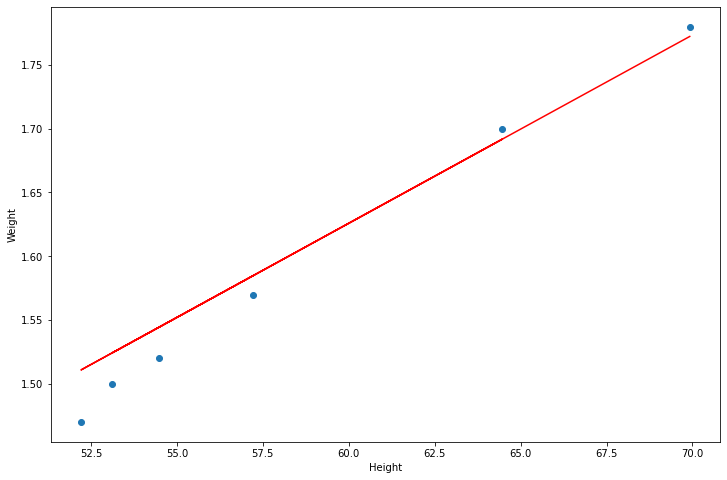

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()


Uma das variações no treinamento de regressões lineares é o percentual do conjunto de dados que é utilizado para o treinamento. Na maioria dos cenários, quanto mais dados você utilizar para treinar o modelo, melhor. No entanto, isso não significa necessariamente que o modelo trará melhor resultado quando aplicado a outros dados. Vamos fazer esse teste, alterando o conjunto de treinamento para conter 80% dos dados disponíveis.

In [31]:
from sklearn.model_selection import train_test_split
X = df[['Weight']]
Y = df['Height']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Com esse novo conjunto, repetimos o treinamento e geramos um novo modelo. Veja a seguir os coeficientes modificados, adequados ao novo conjunto de treinamento. Observe também que o score calculado para o modelo é ligeiramente menor que o calculado anteriormente, indicando que ele capturou menos a variância dos resultados no conjunto de treinamento.

In [33]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [40]:
coeficiente_linear = linear_model.intercept_
coeficiente_angular = linear_model.coef_[0]

print('Modelo Linear Simples: Intercept = {:.5}'.format(coeficiente_linear))
print('Modelo Linear Simples: Coefficient = {:.5}'.format(coeficiente_angular))
print('Modelo Linear Simples: Weight = {:.5} + {:.5}(Height)'.format(coeficiente_linear, coeficiente_angular))

Modelo Linear Simples: Intercept = 0.58047
Modelo Linear Simples: Coefficient = 0.017299
Modelo Linear Simples: Weight = 0.58047 + 0.017299(Height)


In [41]:
print('Training_score: ', linear_model.score(x_train, y_train))

Training_score:  0.9950408444545057


In [ ]:
# teste do modelo


Vamos prosseguir e aplicar o modelo ao conjunto de teste. Note que, com esse novo modelo, o score R^2 é maior que o anterior, indicando que os valores se aproximam mais dos dados do conjunto de teste.

In [42]:
y_pred = linear_model.predict(x_test)


In [44]:
from sklearn.metrics import r2_score

print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.8923759850742792


A seguir, você pode ver o gráfico correspondente ao modelo aplicado sobre o conjunto de teste e como a reta se aproxima dos pontos originais.

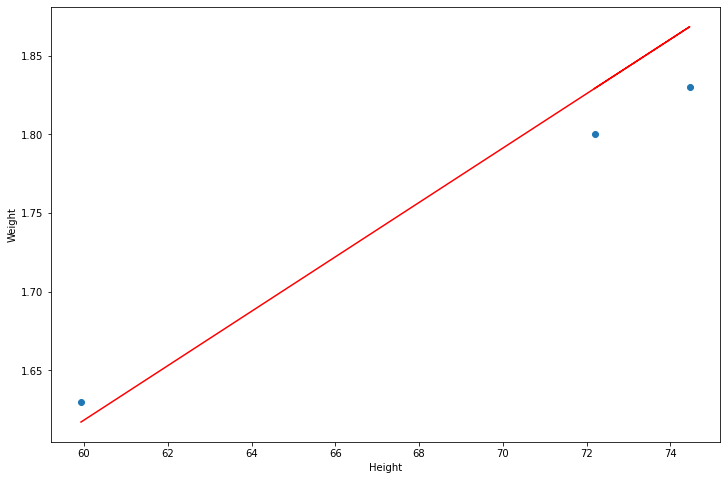

In [50]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()